## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  30.266087   819.144298  0.842362   8.348697  1.714471
1  68.749960   614.990040  0.503353  10.332690  1.521646
2  72.250558   513.438360  0.475832   5.257309  1.295723
3  87.472900  1275.202254  0.150210   6.404798  1.172670
4  40.306840  1741.921596  0.366172   1.450407  1.191604


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.98174 | train_mse: 2.10917 | train_mae: 1.11071 |  0:00:00s
epoch 1  | loss: 0.56006 | train_mse: 1.80193 | train_mae: 1.00489 |  0:00:00s
epoch 2  | loss: 0.53036 | train_mse: 1.9364  | train_mae: 1.02985 |  0:00:00s


epoch 3  | loss: 0.66579 | train_mse: 2.02987 | train_mae: 1.08745 |  0:00:00s
epoch 4  | loss: 0.45627 | train_mse: 0.89424 | train_mae: 0.77356 |  0:00:00s
epoch 5  | loss: 0.3679  | train_mse: 0.57965 | train_mae: 0.61481 |  0:00:00s


epoch 6  | loss: 0.2679  | train_mse: 0.74667 | train_mae: 0.67693 |  0:00:00s
epoch 7  | loss: 0.46013 | train_mse: 0.98445 | train_mae: 0.77112 |  0:00:00s
epoch 8  | loss: 0.5273  | train_mse: 0.83055 | train_mae: 0.73003 |  0:00:00s
epoch 9  | loss: 0.39039 | train_mse: 0.75187 | train_mae: 0.70727 |  0:00:00s


epoch 10 | loss: 0.45986 | train_mse: 0.51865 | train_mae: 0.56842 |  0:00:00s
epoch 11 | loss: 0.44286 | train_mse: 0.46926 | train_mae: 0.52854 |  0:00:01s
epoch 12 | loss: 0.40677 | train_mse: 0.38407 | train_mae: 0.47455 |  0:00:01s


epoch 13 | loss: 0.36845 | train_mse: 0.40628 | train_mae: 0.46783 |  0:00:01s
epoch 14 | loss: 0.36581 | train_mse: 0.36988 | train_mae: 0.44936 |  0:00:01s


epoch 15 | loss: 0.30093 | train_mse: 0.38236 | train_mae: 0.43928 |  0:00:01s
epoch 16 | loss: 0.29636 | train_mse: 0.4071  | train_mae: 0.46133 |  0:00:01s
epoch 17 | loss: 0.32318 | train_mse: 0.44779 | train_mae: 0.48908 |  0:00:01s


epoch 18 | loss: 0.30848 | train_mse: 0.38981 | train_mae: 0.46491 |  0:00:01s
epoch 19 | loss: 0.29932 | train_mse: 0.39344 | train_mae: 0.45728 |  0:00:01s
epoch 20 | loss: 0.33751 | train_mse: 0.42586 | train_mae: 0.48309 |  0:00:01s


epoch 21 | loss: 0.27284 | train_mse: 0.33991 | train_mae: 0.43718 |  0:00:02s
epoch 22 | loss: 0.31958 | train_mse: 0.34185 | train_mae: 0.44203 |  0:00:02s
epoch 23 | loss: 0.24056 | train_mse: 0.35923 | train_mae: 0.4394  |  0:00:02s


epoch 24 | loss: 0.31068 | train_mse: 0.24802 | train_mae: 0.38204 |  0:00:02s
epoch 25 | loss: 0.2271  | train_mse: 0.27525 | train_mae: 0.388   |  0:00:02s
epoch 26 | loss: 0.38085 | train_mse: 0.31853 | train_mae: 0.41636 |  0:00:02s


epoch 27 | loss: 0.34381 | train_mse: 0.30699 | train_mae: 0.40672 |  0:00:02s
epoch 28 | loss: 0.30788 | train_mse: 0.25716 | train_mae: 0.38264 |  0:00:02s
epoch 29 | loss: 0.27986 | train_mse: 0.25067 | train_mae: 0.38363 |  0:00:02s


epoch 30 | loss: 0.2385  | train_mse: 0.26447 | train_mae: 0.39273 |  0:00:02s
epoch 31 | loss: 0.29779 | train_mse: 0.24057 | train_mae: 0.37962 |  0:00:02s
epoch 32 | loss: 0.37592 | train_mse: 0.22963 | train_mae: 0.36442 |  0:00:02s


epoch 33 | loss: 0.33096 | train_mse: 0.20355 | train_mae: 0.33156 |  0:00:03s
epoch 34 | loss: 0.26578 | train_mse: 0.17242 | train_mae: 0.30836 |  0:00:03s


epoch 35 | loss: 0.26112 | train_mse: 0.17524 | train_mae: 0.31808 |  0:00:03s
epoch 36 | loss: 0.19475 | train_mse: 0.18444 | train_mae: 0.33522 |  0:00:03s
epoch 37 | loss: 0.20558 | train_mse: 0.19989 | train_mae: 0.35677 |  0:00:03s
epoch 38 | loss: 0.19909 | train_mse: 0.19704 | train_mae: 0.35138 |  0:00:03s


epoch 39 | loss: 0.20113 | train_mse: 0.16598 | train_mae: 0.32    |  0:00:03s
epoch 40 | loss: 0.20363 | train_mse: 0.15003 | train_mae: 0.30034 |  0:00:03s
epoch 41 | loss: 0.17455 | train_mse: 0.12656 | train_mae: 0.28217 |  0:00:03s


epoch 42 | loss: 0.17785 | train_mse: 0.14859 | train_mae: 0.30486 |  0:00:03s
epoch 43 | loss: 0.1714  | train_mse: 0.18034 | train_mae: 0.33555 |  0:00:03s
epoch 44 | loss: 0.16597 | train_mse: 0.25114 | train_mae: 0.38502 |  0:00:03s


epoch 45 | loss: 0.1501  | train_mse: 0.22252 | train_mae: 0.35615 |  0:00:03s
epoch 46 | loss: 0.17029 | train_mse: 0.17188 | train_mae: 0.30972 |  0:00:04s
epoch 47 | loss: 0.16333 | train_mse: 0.15734 | train_mae: 0.29256 |  0:00:04s


epoch 48 | loss: 0.19969 | train_mse: 0.16619 | train_mae: 0.30658 |  0:00:04s
epoch 49 | loss: 0.13197 | train_mse: 0.19984 | train_mae: 0.33049 |  0:00:04s
epoch 50 | loss: 0.28347 | train_mse: 0.20563 | train_mae: 0.34126 |  0:00:04s
epoch 51 | loss: 0.23461 | train_mse: 0.20082 | train_mae: 0.34436 |  0:00:04s


epoch 52 | loss: 0.17151 | train_mse: 0.17401 | train_mae: 0.32061 |  0:00:04s
epoch 53 | loss: 0.19325 | train_mse: 0.18577 | train_mae: 0.32758 |  0:00:04s
epoch 54 | loss: 0.17152 | train_mse: 0.22349 | train_mae: 0.35896 |  0:00:04s
epoch 55 | loss: 0.22837 | train_mse: 0.24174 | train_mae: 0.36307 |  0:00:04s


epoch 56 | loss: 0.22604 | train_mse: 0.20122 | train_mae: 0.3389  |  0:00:04s
epoch 57 | loss: 0.26197 | train_mse: 0.18012 | train_mae: 0.31665 |  0:00:04s
epoch 58 | loss: 0.1421  | train_mse: 0.14815 | train_mae: 0.28672 |  0:00:04s


epoch 59 | loss: 0.1752  | train_mse: 0.13123 | train_mae: 0.27122 |  0:00:04s
epoch 60 | loss: 0.15009 | train_mse: 0.14578 | train_mae: 0.27042 |  0:00:05s
epoch 61 | loss: 0.32765 | train_mse: 0.18613 | train_mae: 0.30509 |  0:00:05s


epoch 62 | loss: 0.22688 | train_mse: 0.18189 | train_mae: 0.30681 |  0:00:05s
epoch 63 | loss: 0.31749 | train_mse: 0.14264 | train_mae: 0.27492 |  0:00:05s
epoch 64 | loss: 0.17281 | train_mse: 0.12395 | train_mae: 0.25296 |  0:00:05s
epoch 65 | loss: 0.14025 | train_mse: 0.12318 | train_mae: 0.25958 |  0:00:05s


epoch 66 | loss: 0.23233 | train_mse: 0.12681 | train_mae: 0.25754 |  0:00:05s
epoch 67 | loss: 0.21169 | train_mse: 0.12497 | train_mae: 0.25563 |  0:00:05s
epoch 68 | loss: 0.27552 | train_mse: 0.11342 | train_mae: 0.24278 |  0:00:05s


epoch 69 | loss: 0.15898 | train_mse: 0.10484 | train_mae: 0.23295 |  0:00:05s
epoch 70 | loss: 0.13716 | train_mse: 0.0987  | train_mae: 0.23073 |  0:00:05s
epoch 71 | loss: 0.14777 | train_mse: 0.10294 | train_mae: 0.24157 |  0:00:05s


epoch 72 | loss: 0.21348 | train_mse: 0.13969 | train_mae: 0.27252 |  0:00:05s
epoch 73 | loss: 0.18937 | train_mse: 0.15426 | train_mae: 0.28962 |  0:00:05s
epoch 74 | loss: 0.19427 | train_mse: 0.12466 | train_mae: 0.25569 |  0:00:06s


epoch 75 | loss: 0.1259  | train_mse: 0.11381 | train_mae: 0.24618 |  0:00:06s
epoch 76 | loss: 0.21445 | train_mse: 0.10426 | train_mae: 0.23746 |  0:00:06s
epoch 77 | loss: 0.31149 | train_mse: 0.10633 | train_mae: 0.23816 |  0:00:06s


epoch 78 | loss: 0.13903 | train_mse: 0.10904 | train_mae: 0.24762 |  0:00:06s
epoch 79 | loss: 0.20598 | train_mse: 0.11706 | train_mae: 0.25717 |  0:00:06s
epoch 80 | loss: 0.21699 | train_mse: 0.11532 | train_mae: 0.25888 |  0:00:06s
epoch 81 | loss: 0.20115 | train_mse: 0.11201 | train_mae: 0.25262 |  0:00:06s


epoch 82 | loss: 0.23679 | train_mse: 0.11015 | train_mae: 0.25386 |  0:00:06s
epoch 83 | loss: 0.14371 | train_mse: 0.10514 | train_mae: 0.24286 |  0:00:06s
epoch 84 | loss: 0.1375  | train_mse: 0.09892 | train_mae: 0.2384  |  0:00:06s


epoch 85 | loss: 0.25596 | train_mse: 0.10086 | train_mae: 0.24626 |  0:00:06s
epoch 86 | loss: 0.14632 | train_mse: 0.13065 | train_mae: 0.28324 |  0:00:06s
epoch 87 | loss: 0.12536 | train_mse: 0.14469 | train_mae: 0.29586 |  0:00:06s


epoch 88 | loss: 0.16263 | train_mse: 0.12744 | train_mae: 0.27601 |  0:00:07s
epoch 89 | loss: 0.16758 | train_mse: 0.10045 | train_mae: 0.24114 |  0:00:07s
epoch 90 | loss: 0.17655 | train_mse: 0.09421 | train_mae: 0.23461 |  0:00:07s


epoch 91 | loss: 0.19141 | train_mse: 0.10408 | train_mae: 0.25035 |  0:00:07s
epoch 92 | loss: 0.16339 | train_mse: 0.10626 | train_mae: 0.25048 |  0:00:07s
epoch 93 | loss: 0.15984 | train_mse: 0.10652 | train_mae: 0.25726 |  0:00:07s


epoch 94 | loss: 0.16288 | train_mse: 0.09478 | train_mae: 0.23639 |  0:00:07s
epoch 95 | loss: 0.3867  | train_mse: 0.09606 | train_mae: 0.23817 |  0:00:07s
epoch 96 | loss: 0.23727 | train_mse: 0.10401 | train_mae: 0.25608 |  0:00:07s
epoch 97 | loss: 0.23918 | train_mse: 0.09477 | train_mae: 0.23558 |  0:00:07s


epoch 98 | loss: 0.16584 | train_mse: 0.09674 | train_mae: 0.23388 |  0:00:07s
epoch 99 | loss: 0.18341 | train_mse: 0.09769 | train_mae: 0.23221 |  0:00:07s
epoch 100| loss: 0.13439 | train_mse: 0.09473 | train_mae: 0.23081 |  0:00:07s


epoch 101| loss: 0.18383 | train_mse: 0.09382 | train_mae: 0.23031 |  0:00:07s
epoch 102| loss: 0.14792 | train_mse: 0.09914 | train_mae: 0.23565 |  0:00:08s
epoch 103| loss: 0.15919 | train_mse: 0.09224 | train_mae: 0.2288  |  0:00:08s


epoch 104| loss: 0.17765 | train_mse: 0.10683 | train_mae: 0.24963 |  0:00:08s
epoch 105| loss: 0.25049 | train_mse: 0.1156  | train_mae: 0.26112 |  0:00:08s
epoch 106| loss: 0.13525 | train_mse: 0.12763 | train_mae: 0.27647 |  0:00:08s


epoch 107| loss: 0.18656 | train_mse: 0.13582 | train_mae: 0.27994 |  0:00:08s
epoch 108| loss: 0.17631 | train_mse: 0.11314 | train_mae: 0.25893 |  0:00:08s
epoch 109| loss: 0.17937 | train_mse: 0.09628 | train_mae: 0.24172 |  0:00:08s


epoch 110| loss: 0.20147 | train_mse: 0.09337 | train_mae: 0.2344  |  0:00:08s
epoch 111| loss: 0.11434 | train_mse: 0.0896  | train_mae: 0.22932 |  0:00:08s
epoch 112| loss: 0.11784 | train_mse: 0.08558 | train_mae: 0.22404 |  0:00:08s
epoch 113| loss: 0.11905 | train_mse: 0.08137 | train_mae: 0.21948 |  0:00:08s


epoch 114| loss: 0.20812 | train_mse: 0.07962 | train_mae: 0.21521 |  0:00:08s
epoch 115| loss: 0.19798 | train_mse: 0.08608 | train_mae: 0.22471 |  0:00:08s


epoch 116| loss: 0.1345  | train_mse: 0.08664 | train_mae: 0.22468 |  0:00:09s
epoch 117| loss: 0.18039 | train_mse: 0.08533 | train_mae: 0.22466 |  0:00:09s
epoch 118| loss: 0.16296 | train_mse: 0.09698 | train_mae: 0.22453 |  0:00:09s
epoch 119| loss: 0.13408 | train_mse: 0.09995 | train_mae: 0.22993 |  0:00:09s


epoch 120| loss: 0.12972 | train_mse: 0.11241 | train_mae: 0.24636 |  0:00:09s
epoch 121| loss: 0.23692 | train_mse: 0.12626 | train_mae: 0.25027 |  0:00:09s
epoch 122| loss: 0.22532 | train_mse: 0.09788 | train_mae: 0.22235 |  0:00:09s
epoch 123| loss: 0.1285  | train_mse: 0.10154 | train_mae: 0.21884 |  0:00:09s


epoch 124| loss: 0.1865  | train_mse: 0.1068  | train_mae: 0.22743 |  0:00:09s
epoch 125| loss: 0.19514 | train_mse: 0.11545 | train_mae: 0.23527 |  0:00:09s
epoch 126| loss: 0.31758 | train_mse: 0.1224  | train_mae: 0.23782 |  0:00:09s
epoch 127| loss: 0.11836 | train_mse: 0.10625 | train_mae: 0.2314  |  0:00:09s


epoch 128| loss: 0.11329 | train_mse: 0.09671 | train_mae: 0.2248  |  0:00:09s
epoch 129| loss: 0.13161 | train_mse: 0.09721 | train_mae: 0.2174  |  0:00:09s
epoch 130| loss: 0.19251 | train_mse: 0.10691 | train_mae: 0.22893 |  0:00:10s


epoch 131| loss: 0.11569 | train_mse: 0.10505 | train_mae: 0.22305 |  0:00:10s
epoch 132| loss: 0.14357 | train_mse: 0.11514 | train_mae: 0.23095 |  0:00:10s
epoch 133| loss: 0.18386 | train_mse: 0.13905 | train_mae: 0.25502 |  0:00:10s
epoch 134| loss: 0.1607  | train_mse: 0.13846 | train_mae: 0.25142 |  0:00:10s


epoch 135| loss: 0.13811 | train_mse: 0.13744 | train_mae: 0.25382 |  0:00:10s
epoch 136| loss: 0.13487 | train_mse: 0.14447 | train_mae: 0.26223 |  0:00:10s
epoch 137| loss: 0.13307 | train_mse: 0.13275 | train_mae: 0.2489  |  0:00:10s
epoch 138| loss: 0.16332 | train_mse: 0.12831 | train_mae: 0.25296 |  0:00:10s


epoch 139| loss: 0.12698 | train_mse: 0.1264  | train_mae: 0.25176 |  0:00:10s
epoch 140| loss: 0.17027 | train_mse: 0.1249  | train_mae: 0.25829 |  0:00:10s
epoch 141| loss: 0.13795 | train_mse: 0.10989 | train_mae: 0.24618 |  0:00:10s


epoch 142| loss: 0.12765 | train_mse: 0.10651 | train_mae: 0.24745 |  0:00:10s
epoch 143| loss: 0.20642 | train_mse: 0.09795 | train_mae: 0.23819 |  0:00:10s
epoch 144| loss: 0.2113  | train_mse: 0.09748 | train_mae: 0.23278 |  0:00:10s


epoch 145| loss: 0.17133 | train_mse: 0.09666 | train_mae: 0.23741 |  0:00:11s
epoch 146| loss: 0.13936 | train_mse: 0.09704 | train_mae: 0.24158 |  0:00:11s
epoch 147| loss: 0.25411 | train_mse: 0.08717 | train_mae: 0.22806 |  0:00:11s
epoch 148| loss: 0.09377 | train_mse: 0.08805 | train_mae: 0.22237 |  0:00:11s


epoch 149| loss: 0.18026 | train_mse: 0.08864 | train_mae: 0.22696 |  0:00:11s
epoch 150| loss: 0.13359 | train_mse: 0.09345 | train_mae: 0.23047 |  0:00:11s
epoch 151| loss: 0.14751 | train_mse: 0.09135 | train_mae: 0.23107 |  0:00:11s
epoch 152| loss: 0.11983 | train_mse: 0.07661 | train_mae: 0.21586 |  0:00:11s


epoch 153| loss: 0.11329 | train_mse: 0.07875 | train_mae: 0.22518 |  0:00:11s
epoch 154| loss: 0.15024 | train_mse: 0.08876 | train_mae: 0.23839 |  0:00:11s
epoch 155| loss: 0.1063  | train_mse: 0.10099 | train_mae: 0.25214 |  0:00:11s
epoch 156| loss: 0.14368 | train_mse: 0.10205 | train_mae: 0.24883 |  0:00:11s


epoch 157| loss: 0.13808 | train_mse: 0.11666 | train_mae: 0.25602 |  0:00:11s
epoch 158| loss: 0.10279 | train_mse: 0.1192  | train_mae: 0.246   |  0:00:11s
epoch 159| loss: 0.12082 | train_mse: 0.12244 | train_mae: 0.2449  |  0:00:12s


epoch 160| loss: 0.15931 | train_mse: 0.12231 | train_mae: 0.24063 |  0:00:12s
epoch 161| loss: 0.16602 | train_mse: 0.11284 | train_mae: 0.24107 |  0:00:12s
epoch 162| loss: 0.1227  | train_mse: 0.10696 | train_mae: 0.24045 |  0:00:12s


epoch 163| loss: 0.13533 | train_mse: 0.09628 | train_mae: 0.23527 |  0:00:12s
epoch 164| loss: 0.21446 | train_mse: 0.10428 | train_mae: 0.23929 |  0:00:12s

Early stopping occurred at epoch 164 with best_epoch = 114 and best_train_mae = 0.21521
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

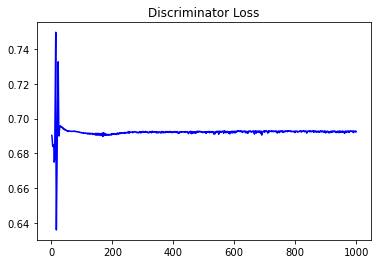

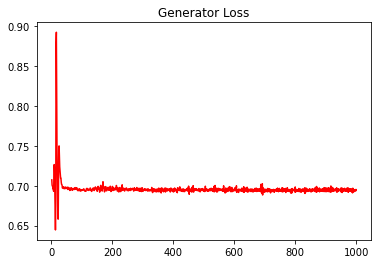

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.37356528632401764


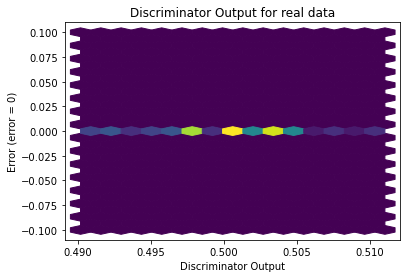

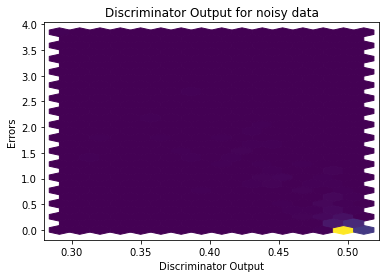

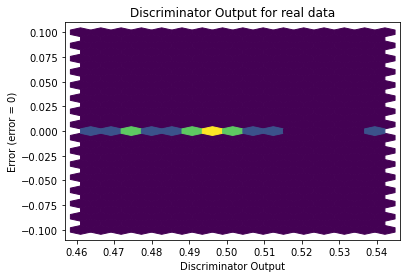

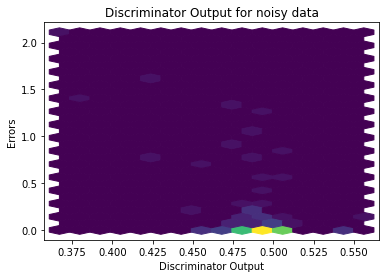

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


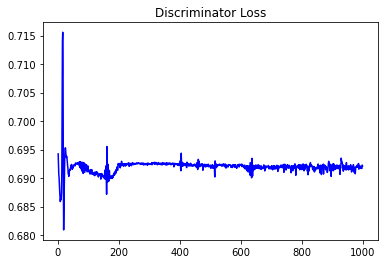

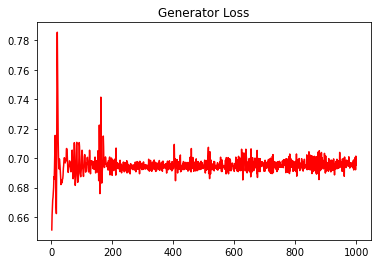

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3155159991607042


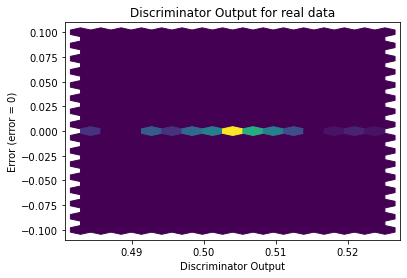

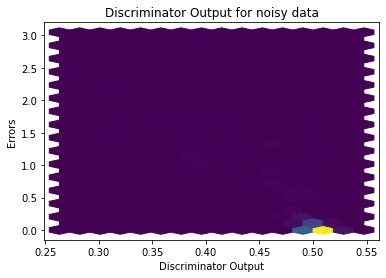

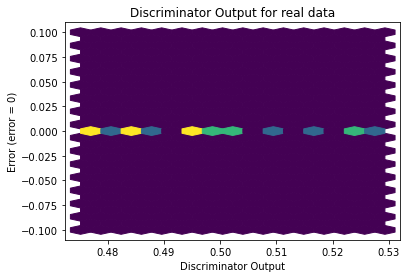

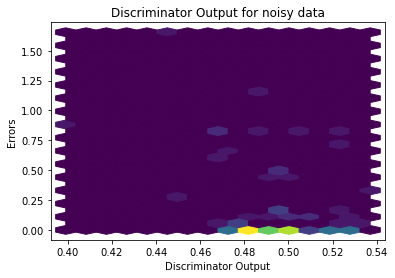

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5493]], requires_grad=True)
